### Import Packages

In [1]:
# basic packages
import numpy as np
import pandas as pd
import datetime

# for data cleaning
import janitor
from janitor import clean_names, remove_empty

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for datetime converstion
import datetime
from calendar import month_abbr

### Read Data

In [2]:
# read in csv
registration_df = pd.read_csv('new-voter-registrations.csv', delimiter=',')

# display df
registration_df.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


In [3]:
# display info
registration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


In [4]:
# summary statistics
registration_df.groupby('Jurisdiction').describe()

Year                                                    \
                     count    mean       std     min     25%     50%     75%   
Jurisdiction                                                                   
Arizona                8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
California             8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
Colorado               8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
Delaware               8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
District of Columbia  10.0  2018.0  2.108185  2016.0  2016.0  2018.0  2020.0   
Florida                8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
Georgia                8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
Illinois               8.0  2018.0  2.138090  2016.0  2016.0  2018.0  2020.0   
Maryland              10.0  2018.0  2.108185  2016.0  2016.0  2018.0  2020.0   
North Carolina        10.0  2018.0  2.108185  2016.0  2016.0  2018.0  2020.0   
Texas                 10.0  2018.0  2.108185  2016.0  2016.0  2018.0  2020.0   
Virginia              10.0  2018.0  2.108185  2016.0  2016.0  2018.0  2020.0   

                             New registered voters                            \
                         max                 count        mean           std   
Jurisdiction                                                                   
Arizona               2020.0                   8.0   35311.500  14267.101648   
California            2020.0                   8.0  144545.375  63833.837744   
Colorado              2020.0                   8.0   20527.500   7733.524903   
Delaware              2020.0                   8.0    3166.375   1286.450037   
District of Columbia  2020.0                  10.0    3248.400   1332.059491   
Florida               2020.0                   8.0   65868.125  27112.772448   
Georgia               2020.0                   8.0   36604.125  11881.333889   
Illinois              2020.0                   8.0   56840.375  23950.194935   
Maryland              2020.0                  10.0   22133.500   9613.990549   
North Carolina        2020.0                  10.0   56040.800  27622.784508   
Texas                 2020.0                  10.0  114610.100  46138.898336   
Virginia              2020.0                  10.0   24845.200  11934.022120   

                                                                         
                          min        25%       50%        75%       max  
Jurisdiction                                                             
Arizona               10249.0   29464.00   32550.5   49173.75   51155.0  
California            38970.0   99426.25  162936.5  178977.00  238281.0  
Colorado               6034.0   18498.50   20483.5   23059.75   33374.0  
Delaware                589.0    2889.00    3314.5    3676.25    5124.0  
District of Columbia   1281.0    2378.75    3144.0    3954.75    5714.0  
Florida               21031.0   51938.75   64249.5   79937.25  109859.0  
Georgia               15484.0   32785.00   37800.5   41769.50   55386.0  
Illinois              21332.0   44342.25   50340.5   70365.75   99674.0  
Maryland               5828.0   19862.00   22510.0   25957.25   40497.0  
North Carolina        23517.0   35280.75   54430.0   69573.75  111990.0  
Texas                 34694.0  100759.75  131470.0  141039.00  170607.0  
Virginia               5467.0   20139.00   26086.5   30995.75   44171.0

### Analysis/Visualizations

##### 1a. How many new voters registered in each state by year? What state had the most new voters register in each year?

In [36]:
# new voters by state and year 
registration_state_year_df = registration_df.drop(['Month'],axis=1)
registration_state_year_df = registration_state_year_df.groupby(['Jurisdiction', 'Year']).sum(['New registered voters']).reset_index()
registration_state_year_df = registration_state_year_df.sort_values(by=['New registered voters'], ascending = False)

# display df
registration_state_year_df.head()

,Jurisdiction,Year,New registered voters,MonthNum
20,Texas,2016,681666,15
3,California,2020,605656,10
2,California,2016,550707,10
21,Texas,2020,464435,15
18,North Carolina,2016,280557,15


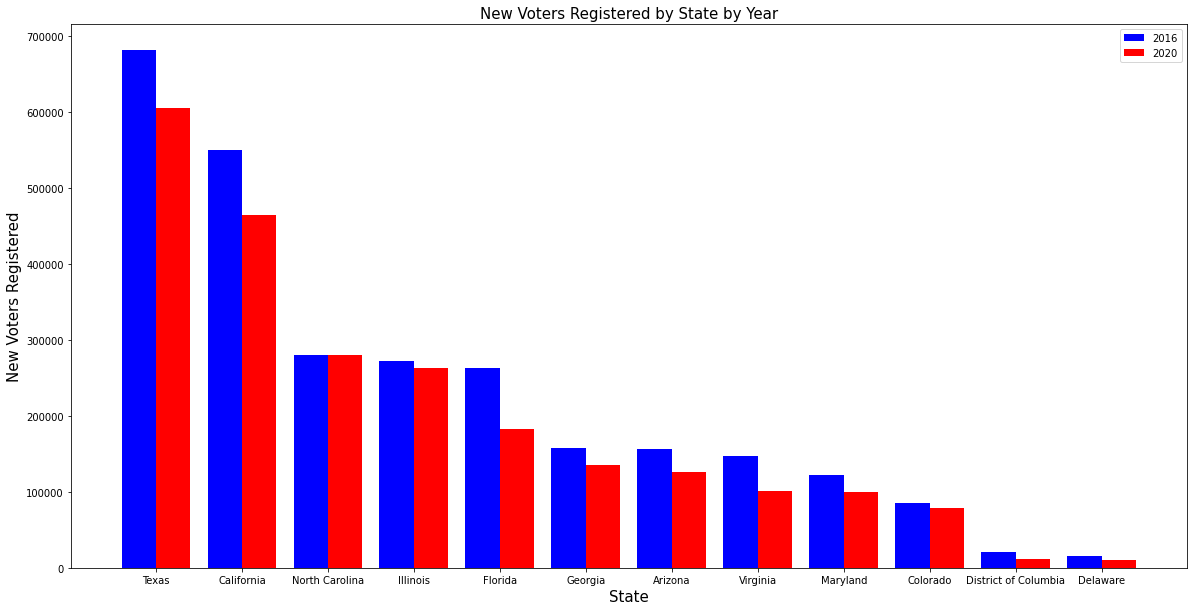

In [6]:
# divide data by year
new_df = registration_state_year_df.loc[(registration_state_year_df['Year'] == 2016)]
new_df_2 = registration_state_year_df.loc[(registration_state_year_df['Year'] == 2020)]

# update figure size
fig, ax = plt.subplots(figsize=(20,10))

# plot
X = new_df['Jurisdiction']
X_axis = np.arange(len(X))

X_2 = new_df_2['Jurisdiction']
X_axis_2 = np.arange(len(X_2))

plt.bar(X_axis - 0.2, new_df['New registered voters'], color ='b', width = 0.4, label = '2016')
plt.bar(X_axis_2 + 0.2, new_df_2['New registered voters'], color ='r', width = 0.4, label = '2020')

plt.legend()

# label axes
plt.xticks(X_axis, X)
plt.xlabel("State", fontsize=15)
plt.ylabel('New Voters Registered', fontsize=15)
plt.title("New Voters Registered by State by Year", fontsize=15)

# display
plt.show()

When looking at the number of new voters registered by state across the two years in the dataset, we can see that Texas had the largest number of new voters registered across both years, followed closely by California.

Across all states, there were more new voters registered in 2016 than 2020. Even in states where new voter registration was similar in both 2016 and 2020, such as North Carolina, there were still more voters registered in 2016 (280,557 in 2016 compared to 279,851 in 2020 in North Carolina). 

##### 1b. How did the number of new voters compare to the total population of the state? How many new voters registered in each state by year as a percentage of the total population of that state? What state had the most new voters register in each year compared to their total population?

In [15]:
# read in 2016 data csv
sixteen_census_pop = pd.read_csv('nst-est2019-alldata.csv', delimiter=',')

# display df
sixteen_census_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [16]:
# remove excess columns
sixteen_census_pop_clean = sixteen_census_pop[['NAME','POPESTIMATE2016']]

# use pyjanitor package to clean data
nineteen_census_pop_clean = (sixteen_census_pop_clean.clean_names(strip_underscores=True).remove_empty())

# rename columns
sixteen_census_pop_clean = sixteen_census_pop_clean.rename(columns={"NAME": "Jurisdiction", "POPESTIMATE2016": "Population"})

# add year column
sixteen_census_pop_clean['Year'] = 2016

# display df
sixteen_census_pop_clean.head()

,Jurisdiction,Population,Year
0,United States,322941311,2016
1,Northeast Region,56042330,2016
2,Midwest Region,67987540,2016
3,South Region,122351760,2016
4,West Region,76559681,2016


In [17]:
# read in 2020 data csv csv
twenty_census_pop = pd.read_csv('NST-EST2021-popchg2020_2021.csv', delimiter=',')

# display df
twenty_census_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,NPOPCHG_2020,NPOPCHG_2021,PPOPCHG_2020,PPOPCHG_2021,NRANK_ESTBASE2020,NRANK_POPEST2020,NRANK_POPEST2021,NRANK_NPCHG2020,NRANK_NPCHG2021,NRANK_PPCHG2020,NRANK_PPCHG2021
0,10,0,0,0,United States,331449281,331501080,331893745,51799,392665,0.015628,0.118451,X,X,X,X,X,X,X
1,20,1,0,0,Northeast Region,57609148,57525633,57159838,-83515,-365795,-0.144968,-0.635882,4,4,4,4,4,4,4
2,20,2,0,0,Midwest Region,68985454,68935174,68841444,-50280,-93730,-0.072885,-0.135968,3,3,3,3,3,3,3
3,20,3,0,0,South Region,126266107,126409007,127225329,142900,816322,0.113174,0.645778,1,1,1,1,1,1,1
4,20,4,0,0,West Region,78588572,78631266,78667134,42694,35868,0.054326,0.045615,2,2,2,2,2,2,2


In [18]:
# remove excess columns
twenty_census_pop_clean = twenty_census_pop[['NAME','POPESTIMATE2020']]

# use pyjanitor package to clean data
twenty_census_pop_clean = (twenty_census_pop_clean.clean_names(strip_underscores=True).remove_empty())

# rename columns
twenty_census_pop_clean = twenty_census_pop_clean.rename(columns={"name": "Jurisdiction", "popestimate2020": "Population"})

# add year column
twenty_census_pop_clean['Year'] = 2020

# display df
twenty_census_pop_clean.head()

,Jurisdiction,Population,Year
0,United States,331501080,2020
1,Northeast Region,57525633,2020
2,Midwest Region,68935174,2020
3,South Region,126409007,2020
4,West Region,78631266,2020


In [83]:
# append 2016 and 2020 population data
final_pop = pd.concat([sixteen_census_pop_clean, twenty_census_pop_clean])

# display df
final_pop.head()

,Jurisdiction,Population,Year
0,United States,322941311,2016
1,Northeast Region,56042330,2016
2,Midwest Region,67987540,2016
3,South Region,122351760,2016
4,West Region,76559681,2016


In [81]:
# remove excess columns for merge
registration_state_year_df = registration_state_year_df[['Jurisdiction', 'Year', 'New registered voters']]

# update dtype for merge
registration_state_year_df['Year'] = registration_state_year_df['Year'].astype('int')

# merge new voter registration df with population df
final_pop_vote = registration_state_year_df.merge(final_pop, how = 'left', on = ['Jurisdiction', 'Year'])

# display df
final_pop_vote.head()

,Jurisdiction,Year,New registered voters,Population
0,Texas,2016,681666,27914410
1,California,2020,605656,39499738
2,California,2016,550707,39167117
3,Texas,2020,464435,29217653
4,North Carolina,2016,280557,10154788


In [87]:
# caculate new voters each year as % of population

final_pop_vote['New Voters % of Pop'] = ((final_pop_vote['New registered voters']/final_pop_vote['Population']) * 100).round(2)

final_pop_vote = final_pop_vote.sort_values(by=['New Voters % of Pop'], ascending = False)


# display df
final_pop_vote.head()

,Jurisdiction,Year,New registered voters,Population,New Voters % of Pop
20,District of Columbia,2016,20371,685815,2.97
4,North Carolina,2016,280557,10154788,2.76
5,North Carolina,2020,279851,10457177,2.68
0,Texas,2016,681666,27914410,2.44
11,Arizona,2016,156289,6941072,2.25


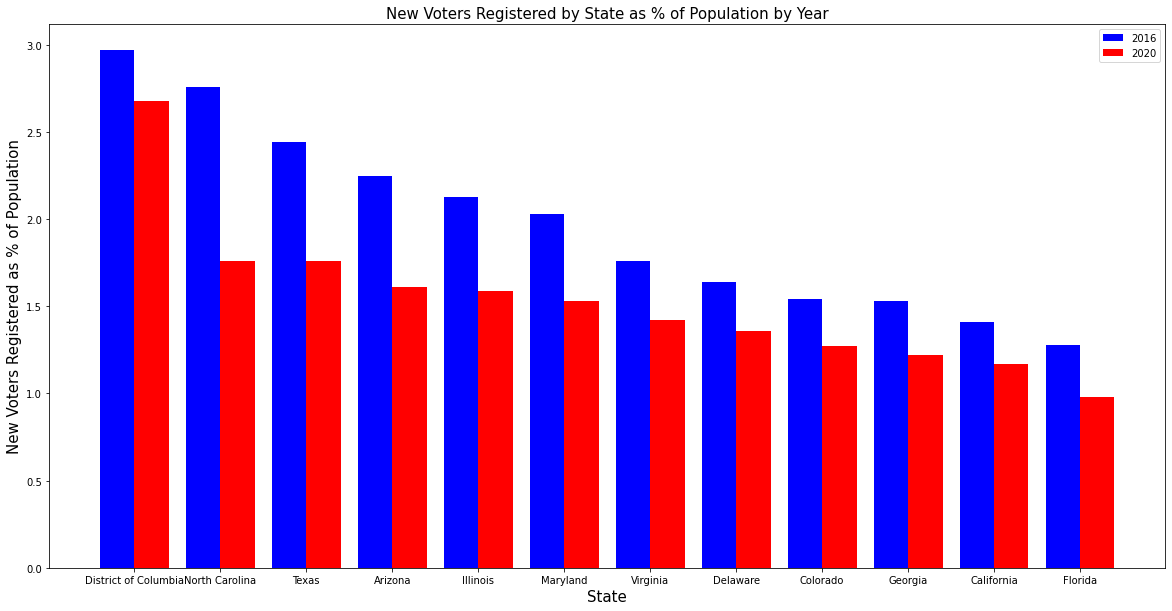

In [80]:
# divide data by year
final_pop_vote_1 = final_pop_vote.loc[(final_pop_vote['Year'] == 2016)]
final_pop_vote_2 = final_pop_vote.loc[(final_pop_vote['Year'] == 2020)]

# update figure size
fig, ax = plt.subplots(figsize=(20,10))

# plot
X = final_pop_vote_1['Jurisdiction']
X_axis = np.arange(len(X))

X_2 = final_pop_vote_2['Jurisdiction']
X_axis_2 = np.arange(len(X_2))

plt.bar(X_axis - 0.2, final_pop_vote_1['New Voters % of Pop'], color ='b', width = 0.4, label = '2016')
plt.bar(X_axis_2 + 0.2, final_pop_vote_2['New Voters % of Pop'], color ='r', width = 0.4, label = '2020')

plt.legend()

# label axes
plt.xticks(X_axis, X)
plt.xlabel("State", fontsize=15)
plt.ylabel('New Voters Registered as % of Population', fontsize=15)
plt.title("New Voters Registered by State as % of Population by Year", fontsize=15)

# display
plt.show()

In the above section, when looking at the number of new voters registered by state across the two years in the dataset, we found that Texas had the largest number of new voters registered across both years, followed closely by California. However, when looking at new voter registration as a percentage of the total population, we can see that the District of Columbia had the highest percentage of new voters in both years, with almost 3% of their total population registering to vote in 2016 and a littl over 2.5% registering in 2020. North Carolina, which had the third highest number of new voters register in both 2016 and 2020 (see section 1a), also had high voter registration when compared to their total population, with almost 2.8% of their population registering in 2016 and 2.7% registering in 2020.

##### 2. What month had the highest number of new voters register in each state? Did this vary by year? 

In [7]:
# create MonthYear column
registration_df['Year'] = registration_df['Year'].astype('str')
registration_df['MonthYear'] = registration_df['Month'] + " " + registration_df['Year'] 

# display df
registration_df.head()

,Jurisdiction,Year,Month,New registered voters,MonthYear
0,Arizona,2016,Jan,25852,Jan 2016
1,Arizona,2016,Feb,51155,Feb 2016
2,Arizona,2016,Mar,48614,Mar 2016
3,Arizona,2016,Apr,30668,Apr 2016
4,Arizona,2020,Jan,33229,Jan 2020


In [8]:
# convert MonthYear (month and year) column to datetime
lower_ma = [m.lower() for m in month_abbr]
registration_df['MonthNum'] = registration_df['Month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')
registration_df['MonthYear'] = pd.to_datetime(registration_df.MonthNum.astype(str) + '/' + registration_df.Year.astype(str))

# display df
registration_df.head()

,Jurisdiction,Year,Month,New registered voters,MonthYear,MonthNum
0,Arizona,2016,Jan,25852,2016-01-01,1
1,Arizona,2016,Feb,51155,2016-02-01,2
2,Arizona,2016,Mar,48614,2016-03-01,3
3,Arizona,2016,Apr,30668,2016-04-01,4
4,Arizona,2020,Jan,33229,2020-01-01,1


In [9]:
# set MonthYear column as index
registration_df = registration_df.set_index(['MonthYear'])

# display df
registration_df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2016-01-01', '2016-02-01',
               ...
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01'],
              dtype='datetime64[ns]', name='MonthYear', length=106, freq=None)

In [10]:
# filtering df to just 2016
year_df1 = registration_df.loc[(registration_df['Year'] == '2016')]

# display df
year_df1.head()

,Jurisdiction,Year,Month,New registered voters,MonthNum
MonthYear,,,,,
2016-01-01,Arizona,2016,Jan,25852,1
2016-02-01,Arizona,2016,Feb,51155,2
2016-03-01,Arizona,2016,Mar,48614,3
2016-04-01,Arizona,2016,Apr,30668,4
2016-01-01,California,2016,Jan,87574,1


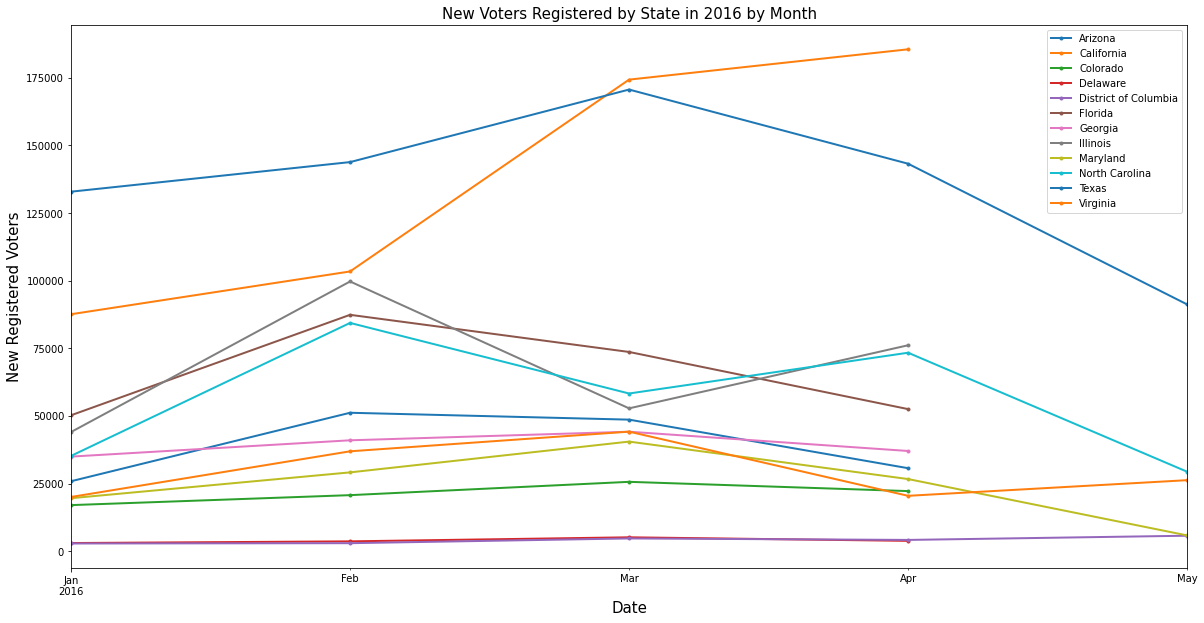

In [11]:
# plot 2016 data
year_df1.groupby('Jurisdiction')["New registered voters"].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=10)
plt.legend()

# label axes
plt.xlabel("Date", fontsize=15)
plt.ylabel("New Registered Voters", fontsize=15)
plt.title("New Voters Registered by State in 2016 by Month", fontsize=15)

# display
plt.show()

In [12]:
# filtering df to just 2020
year_df2 = registration_df.loc[(registration_df['Year'] == '2020')]

# display df
year_df2.head()

,Jurisdiction,Year,Month,New registered voters,MonthNum
MonthYear,,,,,
2020-01-01,Arizona,2020,Jan,33229,1
2020-02-01,Arizona,2020,Feb,50853,2
2020-03-01,Arizona,2020,Mar,31872,3
2020-04-01,Arizona,2020,Apr,10249,4
2020-01-01,California,2020,Jan,151595,1


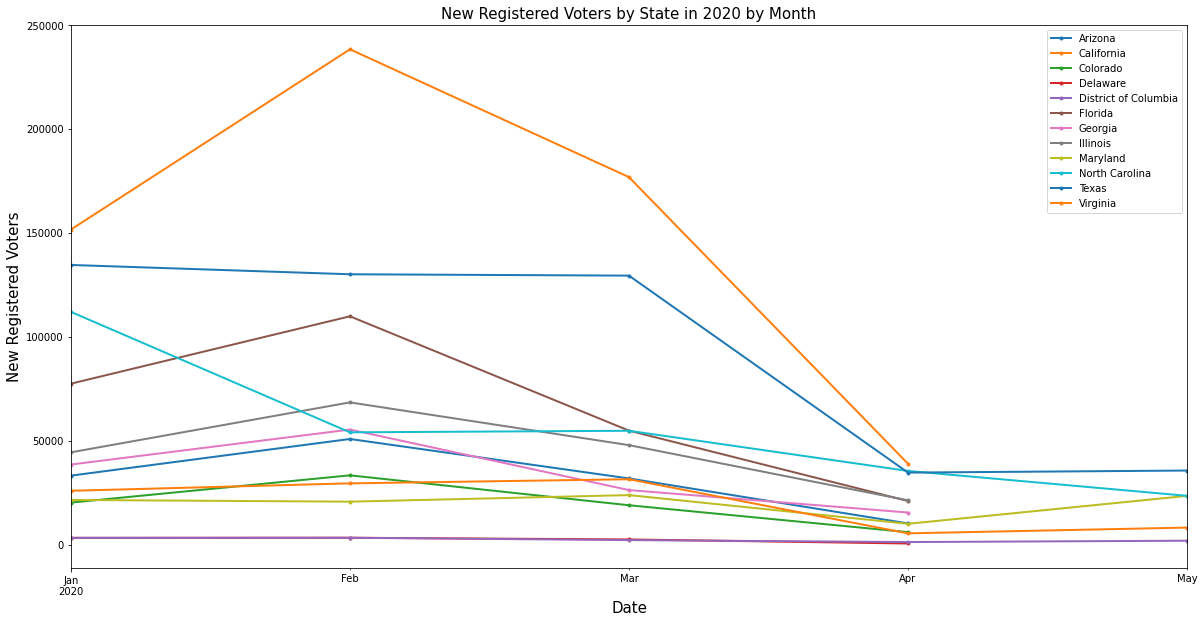

In [13]:
# plot 2020 data
year_df2.groupby('Jurisdiction')["New registered voters"].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=10)
plt.legend()

# label axes
plt.xlabel("Date", fontsize=15)
plt.ylabel("New Registered Voters", fontsize=15)
plt.title("New Registered Voters by State in 2020 by Month", fontsize=15)

# display
plt.show()

In both 2016, for the two largest states, Texas and California, new voter registration peaked in March and April, respectively. In 2020, new voters seemed to register earlier, with California seeing their peek in new voter registration in February. 